참고 : <br>
* https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb
* https://archive.is/fY0FO

In [10]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:<br><br>
* 레이블 클래스<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;T-shirt/top<br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Trouser<br>
&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pullover<br>
&nbsp;&nbsp;&nbsp;&nbsp;3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dress<br>
&nbsp;&nbsp;&nbsp;&nbsp;4&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Coat<br>
&nbsp;&nbsp;&nbsp;&nbsp;5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sandal<br>
&nbsp;&nbsp;&nbsp;&nbsp;6&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Shirt<br>
&nbsp;&nbsp;&nbsp;&nbsp;7&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sneaker<br>
&nbsp;&nbsp;&nbsp;&nbsp;8&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bag<br>
&nbsp;&nbsp;&nbsp;&nbsp;9&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ankle boot

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
train_images.shape

(60000, 28, 28)

### 데이터 탐색

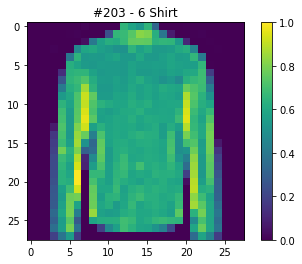

In [35]:
plt.figure()
idx_to_draw = 203 # 바꾸어보세요
plt.imshow(train_images[idx_to_draw])

lbl = train_labels[idx_to_draw]

plt.title('#{} - {} {}'.format(idx_to_draw, lbl, class_names[lbl]))
plt.colorbar()
plt.grid(False)
plt.show()

### Data 전처리<br>
신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

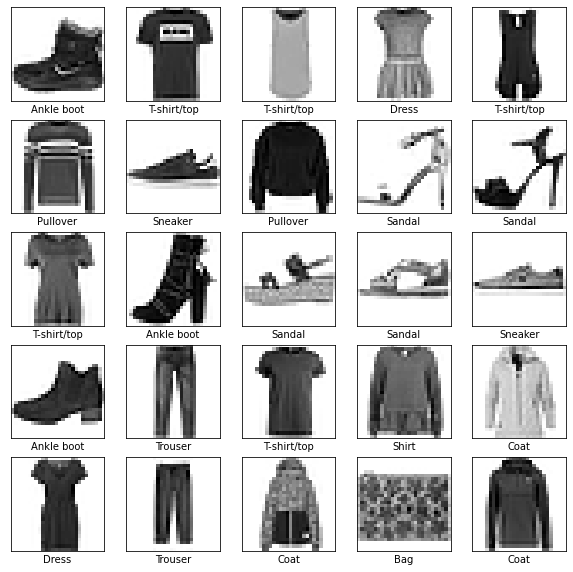

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### TODO: 학습 코드를 위의 참조 url 을 이용하여 완성해보세요

### 모델 구성

In [17]:
# 모델 구성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28*28 = 784 픽셀의 1차원 배열로 변환
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # 소프트맥스 층:10개의 확률을 반환, 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력.
])

In [18]:
# 모델 컴파일 
model.compile(optimizer='adam',  # 옵티마이저 : 손실함수를 바탕으로 모델의 업데이트 방법 결정
              loss='sparse_categorical_crossentropy',  # 손실 함수:오차측정
              metrics=['accuracy']) # 메트릭스(지표): 훈련단계와 테스트단계 모니터링(정확도 측정)

### 모델 훈련

In [19]:
model.fit(train_images, train_labels, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5079 - acc: 0.8207
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3802 - acc: 0.8619
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3397 - acc: 0.8766
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3184 - acc: 0.8837
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2991 - acc: 0.8906
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2848 - acc: 0.8951
Epoch 7/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2730 - acc: 0.8978
Epoch 8/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2609 - acc: 0.9030
Epoch 9/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2553 - acc: 0.9046
Epoch 10/100
60000/60000 [========================

60000/60000 [==============================] - 1s 17us/sample - loss: 0.0678 - acc: 0.9747
Epoch 80/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0687 - acc: 0.9746
Epoch 81/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0667 - acc: 0.9756
Epoch 82/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0665 - acc: 0.9759
Epoch 83/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0658 - acc: 0.9757
Epoch 84/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0631 - acc: 0.9767
Epoch 85/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0651 - acc: 0.9759
Epoch 86/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0660 - acc: 0.9760
Epoch 87/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0633 - acc: 0.9767
Epoch 88/100
60000/60000 [==============================] - 1s 17us/sample - 

epoch이 5였을 때는 약 0.88(88%)정도이 정확도를 달성하였는데 epoch을 100으로 늘린 결과 약 0.98(98%)정도까지 달성하였다.

### 정확도 평가

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)


테스트 정확도: 0.8824


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮은것을 확인.<br>
훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문이다.<br>
과대적합이란 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말한다.

### 예측 만들기

In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[1024] # 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냄.

array([2.0782809e-29, 4.7554269e-14, 1.6556261e-18, 1.5296226e-17,
       1.7992724e-24, 1.3071337e-07, 8.0590781e-23, 9.9999988e-01,
       8.6974500e-20, 5.2284808e-16], dtype=float32)

In [24]:
np.argmax(predictions[1024]) # 모델이 예측한 값

7

In [25]:
test_labels[1024]

7

In [26]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현해보기.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색이다.<Br>
숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)이며 신뢰도 점수가 높을 때도 잘못 예측할 수 있다.

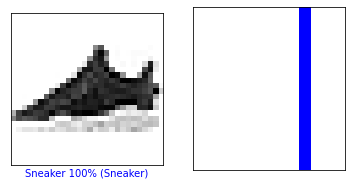

In [27]:
# 1024번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
i = 1024
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

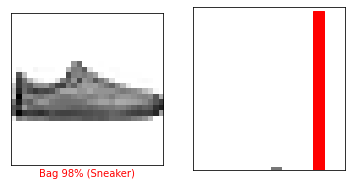

In [28]:
# 12번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

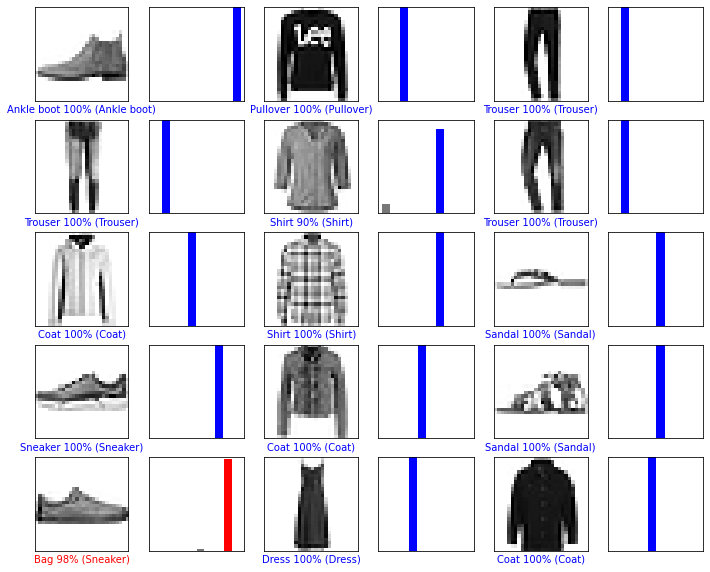

In [29]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [30]:
# 테스트 세트에서 이미지 하나를 선택
img = test_images[1024]

print(img.shape)

(28, 28)


In [31]:
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
# 이미지에 대한 예측
predictions_single = model.predict(img)

print(predictions_single)

[[2.0782809e-29 4.7554269e-14 1.6556324e-18 1.5296283e-17 1.7992862e-24
  1.3071349e-07 8.0591090e-23 9.9999988e-01 8.6974830e-20 5.2285009e-16]]


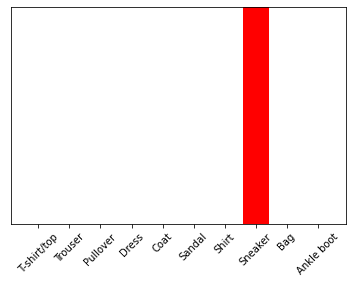

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

7

이전과 마찬가지로 모델의 예측은 레이블 7이다.